<a href="https://colab.research.google.com/github/isa-ulisboa/greends-pml/blob/main/ML_overview_with_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Practical Machine Learning**

Masters in Green Data Science, ISA/ULisboa, 2022-2023

Instructor: Manuel Campagnolo mlc@isa.ulisboa.pt

# Overview of Machine Learning (ML) 

In this course we are dealing with data sets of *labeled examples*. Examples can be scalar numbers, rows of tabular data, images, etc. For tabular data, we refer the to columns as *explanatory variables* (sometimes also called *independent* or *descriptive* variables).

Labels can be categorical, ordinal or continuous. Labels can be refered to as the *response variable* (or *dependent* variable). They are also called *targets*. Typically, we the problems are called:
1. *Regression problems*, when the labels are continuous. 
2. *Classification problems*, when the labels are categorical.

The distinction is not always clear. Some problems can be considered either as regression or classification problems. 

Given a ML problem, i.e. a set of labeled examples, the goal is to build a function $f$ that maps examples to labels or, in other words, that predicts the label from the example.

The outputs of $f$ are called *predictions* or *predicted values*, and the actual labels of the examples are called *actual values* or *target values*.




## Python packages

In this ML course, the main Python packages are:

1. **Fastai**, a high-level package build from `pytorch`. A description of `fastai` is available in the paper *Howard, J.; Gugger, S. Fastai: A Layered API for Deep Learning. Information 2020, 11, 108. https://doi.org/10.3390/info11020108* and on the site https://docs.fast.ai/

2. **Pytorch**: PyTorch is an optimized tensor library for deep learning using GPUs and CPUs;  https://pytorch.org/docs/stable/index.html

3. **Scikit-learn**: Another high-level package build on `NumPy`, `SciPy`, and `matplotlib` which covers most ML techniques except deep learning;  https://scikit-learn.org/stable/index.html.

# Models and parameters


More formally, if $E$ is the set of examples and $L$ is a set that includes the labels, then what we call the *model* is a family of functions $f_{\rm \bf w}$ that depends on a set of parameters ${\rm \bf w}$: $$f_{\rm \bf w}: E → L.$$

It can be more convenient to express the function as depending on the parameters ${\rm \bf w}$ as well as the example ${\rm \bf x}$. The model's predicted label $\hat{y}$ for the example ${\rm \bf x}$ is:

$$\hat{y}=f_{\rm \bf w}({\rm \bf x})= f({\rm \bf x}; {\rm \bf w}).$$

ML practicioners use an enormous variety of models, depending on the problem at hand and on the available computational resources to train the model. Models include convolucional neural networks (CNN) for image classification (resnet and other kind of CNNs), neural networks (NN) for classification of tabular data, linear regression models, decision and regression trees, random forest and other ensemble models, among many other models.


<img src="https://drive.google.com/uc?export=view&id=1rjcetay_O8EPd9mUHh4k1XFQIi84FfX2" width="800" >



## Example of a simple model (simple linear regression)

Suppose that our examples are scalar numbers $x_1,\dots, x_n$ and the labels are continuous labels $y_1, \dots, y_n$. We call $x$ the explanatory variable and $y$ the response variable. 

Let's consider the simple linear regression model:
$f_{\rm a,b}(x)= a \, x + b$. The model parameters are ${\rm \bf w}=(a,b)$ and the predicted values are given by$\\[1em]$ 
$$\hat{y}=f(x; {\rm a,b})=a\, x + b.$$

The target  or actual label values are the $y_1, \dots, y_n$, and the predicted label values are the $\hat{y}_1,\dots,\hat{y}_n$.



## Example of a simple model (quadratic regression)

In notebook [Lesson3_edited_04-how-does-a-neural-net-really-work.ipynb](Lesson3_edited_04-how-does-a-neural-net-really-work.ipynb), a similar simple example was discussed. The only difference was that the model $f_{\rm a,b,c}$ was quadratic instead of linear: 

$$f_{\rm a,b,c}(x)= f(x;a,b,c)= a \, x^2 + b \, x + c.$$

In the illustration below, the observed (actual) values are plotted in blue, and the values preditted by the model for a fixed set of parameters $a=3, b=2, c=1$ are plotted in red.

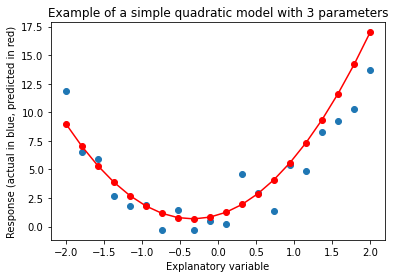

In [ ]:
# example from Lesson3_edited_04-how-does-a-neural-net-really-work.ipynb
import numpy as np
import torch
import matplotlib.pyplot as plt
np.random.seed(42)
def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)
# create synthetic examples (x) and labels (y), and calculate predictions
x = torch.linspace(-2, 2, steps=20)[:,None]
def f(x): return 3*x**2 + 2*x + 1
y = add_noise(f(x), 0.15, 1.5)
ypred=f(x)
# plot 
plt.scatter(x,y);
plt.scatter(x,ypred,color='red');
plt.title("Example of a simple quadratic model with 3 parameters")
plt.xlabel("Explanatory variable")
plt.ylabel("Response (actual in blue, predicted in red)")
plt.plot(x, f(x), 'red')
plt.show()

# Loss function

In ML, it is usual to call *loss* to the **dissimilarity** between actual and predicted label values for a *set* of labeled examples.

Let ${\rm \bf x}_1, \dots , {\rm \bf x}_n$ be a set of examples with labels $y_1, \dots , y_n$. Let $f_{\rm \bf w}$ be our model. Therefore, the predicted labels are 

$$\hat{y}_1=f_{\rm \bf w}({\rm \bf x}_1), \dots, \hat{y}_n=f_{\rm \bf w}({\rm \bf x}_n).$$

The loss over that set of examples is some dissimilarity measure between the actual labels $y_1, \dots , y_n$ and the predicted labels $\hat{y}_1, \dots , \hat{y}_n$.



## Example (simple linear regression)



For the linear regression example, the response variable is continuous. We wish to measure the dissimilarity between the set of actual label values $y_1, \dots , y_n$  and the set of values predicted by the model 
$f_{\rm a,b}(x)= a \, x + b$: 

$$\hat{y}_1=a\, x_1+ b, \dots, \hat{y}_n=a\, x_n+ b.$$

Since the response is continuous, it makes sense to use a function like:

1. Mean absolute error (MAE), given by $\frac{1}{n}\sum_{i=1}^n |y_i-\hat{y}_i|$; or

2. Mean square error (MSE), given by $\frac{1}{n}\sum_{i=1}^n \left(y_i-\hat{y}_i\right)^2$.

## Example (quadratic regression)

In notebook [Lesson3_edited_04-how-does-a-neural-net-really-work.ipynb](Lesson3_edited_04-how-does-a-neural-net-really-work.ipynb), loss was given by MAE, i.e. $\frac{1}{n}\sum_{i=1}^n |y_i-\hat{y}_i|$.

In [ ]:
def mae(preds, acts): return (torch.abs(preds-acts)).mean()

The notebook includes code to interactively change the parameter values and compute the MAE loss function for the data set for an arbitrary choice of weights $(a,b,c)$.

Function `partial` in the code below converts the 4-argument function $f(x,a,b,c)$ into a one argument function $f(x;a,b,c)=f_{\rm a,b,c}(x)$. Therefore, `mk_quad` corresponds to the one argument function $f_{\rm a,b,c}(x)$. Hence it can be passed to `plot_function` which expects a one argument function.



In [ ]:
from fastai.basics import * # necessary for partial
def quad(a, b, c, x): return a*x**2 + b*x + c
def mk_quad(a,b,c): return partial(quad, a,b,c)
def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)
# interactive plot
from ipywidgets import interact
@interact(a=1.1, b=1.1, c=1.1) # this is called a decorator
def plot_quad(a, b, c):
    f = mk_quad(a,b,c)
    plt.scatter(x,y)
    loss = mae(f(x), y)
    plot_function(f, ylim=(-3,12), title=f"MAE: {loss:.2f}")

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

## Dissimilarity measures to define *loss*


To define loss, we then need to choose an appropriate dissimilarity metric between a set of actual $y_1, \dots , y_n$ and predicted labels $\hat{y}_1, \dots , \hat{y}_n$. The choice depends on the type of problem, and while MAE or RMSE are adequate for *regression* problems, other dissimilarities are used for *classification* problems.




## Examples of loss functions for regression problems (MAE, MSE, Huber)



Above, two common loss functions for regression problems were listed

1. Mean absolute error (MAE), given by $\frac{1}{n}\sum_{i=1}^n |y_i-\hat{y}_i|$; or

2. Mean square error (MSE), given by $\frac{1}{n}\sum_{i=1}^n \left(y_i-\hat{y}_i\right)^2$

In the one hand, MAE is not differentiable everywhere, which is an undesirable property for ML. On the other hand, MSE penalizes too much large differences between actual and predicted values, which means that a single example can constraint strongly the solution. 

An alternative is called the Huber loss function, which is differentiable everywhere, and behaves like MSE near the origin and like MAE for large $|y_i-\hat{y}_i|$.


## Example of loss functions for classification problems (cross-entropy)

Classification problems have categorical labels. Therefore, the model predictions should return the most likely label for each example. 

While in regression the model's output is typically an unbounded response variable (for instance, it is $f(x;a,b) = a\, x + b$ in simple linear regression), for classification problems, it is more convenient to have:
1. one output per label;
2. each output being a value between 0 and 1 that can be interpreted as the probability of the label.


<img src="https://drive.google.com/uc?export=view&id=1iD519g8QbBmOGp9SiOQsIneJnWg53SMQ" width="600" >

Therefore, it is usual to have a model that outputs scores $f_1({\rm \bf x};{\rm \bf w_1}), \dots , f_k({\rm \bf x};{\rm \bf w_k})$ for each of the $k$ possible labels, and an additional model component that converts those *raw* scores into probability-like values for the labels.

You saw that kind of probabilistic output when you trained and deployed an image classifier in notebook [Lesson2_edited_book_02_production.ipynb](Lesson2_edited_book_02_production.ipynb). When you did predict the label for a new example with

    learn_inf.predict('images/grizzly.jpg'),

you got a vector of estimated probabilities like the following:

    ('grizzly', tensor(1), tensor([9.0767e-06, 9.9999e-01, 1.5748e-07])).

where the values `9.0767e-06, 9.9999e-01, 1.5748e-07` correspond, respectively, to labels *black*, *grizzly* and *teddy*.




### Softmax 



The unormalized model outputs $f_1, \dots, f_k$ are called *scores*, *logits* or *raw* outputs. Each score $z_i=f_i({\rm \bf x};{\rm \bf w_i})$ is converted into a [0,1] value by the *softmax* function:

$$p_i=\frac{\exp(z_i)}{\sum_{j=1}^k \exp(z_j)} ~~ {\rm which~implies~that} ~~ 0<p_i \le 1.$$

After that transformation, the classification model's probabilistic output is a vector of values $(p_1,\dots,p_k)$, with $p_i \ge 0$ and $\sum p_i=1$ as required for  probability distributions. The predicted label is the one with highest $p$.


### Comparing target and predicted probability distributions



While in the regression problem the loss is a dissimilarity between the actual labels $y_1,\dots,y_n$ and the predicted labels $\hat{y}_1,\dots,\hat{y}_n$ for the set with $n$ examples, in classification with *softmax* the loss is then a dissimilarity between the actual labels $y_1,\dots,y_n$ and the $n$ probability vectors $(p_1,\dots,p_k)_1, \dots, (p_1,\dots,p_k)_n$.

To compare vectors of the same dimension, one can express each target label $y_i$ as a probabilitity distribution with 0 uncertainty. Suppose that there are 3 different possible labels and the actual label of the example is the first label: then, the *target distribution* would be $(1,0,0)$ which can be  compared with the model's output probability distribution $(p_1,p_2,p_3)$. This will be illustrated with an example below.




###Loss functions in fastai



A list of `fastai` loss functions is available in https://docs.fast.ai/losses.html. In general, they are simple adaptations of `pytorch` loss functions listed in https://pytorch.org/docs/stable/nn.html#loss-functions.  The most common *loss* function for classification is called *cross-entropy*. 

Notebook [Lesson1_00_is_it_a_bird_creating_a_model_from_your_own_data.ipynb](Lesson1_00_is_it_a_bird_creating_a_model_from_your_own_data.ipynb) creates the learner with:

    learn = vision_learner(dls, resnet18, metrics=error_rate)

`vision_learner` allows to explicitely define the loss function  with the argument `loss_func`. Since it is not explicitely defined in the code above, we can check the default which is stored in property `loss_func`:

    learn.loss_func

which returns `FlattenedLoss of CrossEntropyLoss()`. This `fastai` loss is described in the Pytorch documentation as the `nn.CrossEntropyLoss` class  [https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html). Hence, the loss function that is applied in the example in the notebook is  `torch.nn.CrossEntropyLoss` that computes the cross entropy loss between input logits and target. 



### Cross-entropy



So, what is the *loss* you see in the output when you train an image classifier in notebook [Lesson2_edited_book_02_production.ipynb](Lesson2_edited_book_02_production.ipynb)?

    epoch 	train_loss 	valid_loss 	error_rate 	time
    0          1.174910        0.043982      0.009091     00:34


Suppose that your model (`resnet`) was trained to classify photos of bears into *black*, *grizzly* and *teddy* as in [Lesson2_edited_book_02_production.ipynb](Lesson2_edited_book_02_production.ipynb). The last layer of the model outputs scores $z_1=f_1(x_1,\dots,x_n), z_2=f_2(x_1,\dots,x_n), z_3=f_3(x_1,\dots,x_n)$, where $z_1$ is associated to *black*, $z_2$ is associated to *grizzly* and $z_3$ is associated to *teddy*. 

The code below creates an example of the outputs for a *batch* of 4 examples. In the matrix below each row is an example and each column is a label. Consider that column 1 is for *black*, column 2 is for *grizzly* and column 3 is for *teddy*.

In [ ]:
import torch
scores=torch.tensor([[4.5,2.1,0.2],
                     [1.3,8.3,0.8],
                     [1.2,1.5,4.2],
                     [5.1,0.4,2.3]])

Looking at the tensor above, it looks like the first and fourth examples have a higher likelihood of being photos of *black* bears, while the second example is more likely a *grizzly* bear and the third one seems to be a *teddy* bear photo. Let's apply *softmax* to convert the raw outputs into probability-like values.

In [ ]:
 softs = scores.softmax(dim=1)
 torch.set_printoptions(sci_mode=False)
 softs

tensor([[    0.9056,     0.0822,     0.0123],
        [    0.0009,     0.9985,     0.0006],
        [    0.0446,     0.0602,     0.8953],
        [    0.9347,     0.0085,     0.0568]])

It is clear that the softmax rule did amplify the difference in values for each example. In each row there is one value close to 1 and the remainder values are close to 0. For each example, *cross-entropy* compares the target distribution with the probability distribution returned by *softmax*. 

Let's suppose that in fact, the first and last examples have actually label *black*, the second is actually *grizzly* and the third is actually *teddy*. Then the target distribution will be 1 for the correct label and 0 for the remaining labels. This is known as  *one-hot encoding* and it's illustrated by the rows of the following tensor (each row is one example):

In [ ]:
target=torch.tensor([[1.,0.,0.],
                     [0.,1.,0.],
                     [0.,0.,1.],
                     [1.,0.,0.]])

Cross-entropy loss measures the dissimilarity between the probability distribution returned by *softmax* $(p_1,p_2,p_3)$ and the target distribution $(t_1,t_2,t_3)$ for the $i$-th example with the expression, and takes values between 0 (optimal value associated to minimum uncertainty) and 1 (maximum value associated to maximum uncertainty, i.e. all probabilities are equal):

$$L_i=-\left( t_1 \, \log(p_1) + t_2 \, \log(p_2) + t_3 \, \log(p_3) \right) \in [0,1].$$

In the expression above, we suppose that the probabilities are non zero. 
For the whole batch of $n$ examples, the cross-entropy loss is given by the average of the $n$ individual loss values:

$$L=\frac{1}{n} \left( L_1+L_2+ \dots,L_n\right).$$

This can be computed with `nn.CrossEntropyLoss()` directly from the *scores* and *target* values as shown below:

In [ ]:
import torch.nn as nn
# compute loss
loss = nn.CrossEntropyLoss()
output = loss(scores, target)
print('Cross Entropy Loss: ', output)

Cross Entropy Loss:  tensor(0.0697)



# ML as an optimization problem



Now, we can define a ML problem as a optimization problem. Given

1.  a set of examples  ${\rm \bf x}_1, \dots , {\rm \bf x}_n$  with labels $y_1, \dots , y_n$
2. a model $f_{\rm \bf w}$
3. a *loss* function $L$

the goal is to determine the optimal set of parameters ${\rm \bf w}$ that minimize the loss $L$ over that set of examples.

## Training and validation sets

To prevent *overfitting* the parameters to the set of examples, an independent set of examples for *validation* are set apart. In general, the example data set with $N$ examples is partitioned into a subset with, say $0.2 \times N$ examples for validation and $0.8 \times N$ examples for training like we saw in [Lesson2_edited_book_02_production.ipynb](Lesson2_edited_book_02_production.ipynb):

    bears = DataBlock(
        blocks=(ImageBlock, CategoryBlock), 
        get_items=get_image_files, 
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label,
        item_tfms=Resize(128))

where `RandomSplitter(valid_pct=0.2, seed=42)` indicates that 20% of the examples are used for validation.

The *training* data set is used to search for the optimal set of weights for the model, typically by iteratively updating the weights from a initial set of weights using *gradient descent* over the loss. The *validation* data set is used to compute the same loss metric over an independent set of examples.

By comparing the training and validation losses it is possible to assess issues in model behaviour like *high bias/underfitting*,  *high variance/overfitting*,  and *unrepresentativeness* of either training or validation set.

## Gradient descent and learning rate

Informally, a gradient measures how much the output of a function changes if you change the inputs a little bit.

Given a model $f_{\rm \bf w}({\rm \bf x})= f({\rm \bf x}; {\rm \bf w})$ and a batch of examples ${\rm \bf x_1}, \dots, {\rm \bf x_n}$, we have seen how we can define a *loss* function 

$$L({\rm \bf x_1, \dots, x_n; w})= L_{\rm \bf x_1, \dots, \rm \bf x_n}(\rm \bf w).$$ 

We can write $L$ just a function of the weights since the ${\rm \bf x_i}$ are fixed for given batch of examples. Our goal is to find the set of weights ${\rm \bf w}$ that minimize $L({\rm \bf w})$. In order to do this iteratively, starting with an arbitrary set of initial weights, we would like to know how $L$ changes with a small change in the weights $\rm \bf w$ from the current set weights ${\rm \bf w}^{*}$.

This  is given by the gradient of $L$ with respect to ${\rm \bf w}$ at ${\rm \bf w}^{*}$, which is a vector of partial derivatives of $L$ with length equal to $m$=number of model parameters.

$$ \nabla L({\rm \bf w}^{*}) = \frac{\partial L}{\partial \rm \bf w}({\rm \bf w}^{*})= \left(\frac{\partial L}{\partial \rm w_1}({\rm \bf w}^{*}), \dots,  \frac{\partial L}{\partial \rm w_m}({\rm \bf w}^{*}) \right).$$

The computation of $\nabla L({\rm \bf w}^{*})$ is usually done by **back-propagation**, which is an automatic differentiation algorithm for calculating gradients for the weights in a neural network graph structure. Back-propagation (aka *backprop*) is an automatic differentiation algorithm that applies the *chain-rule*.

The vector $\nabla L({\rm \bf w}^{*})$ points to the direction from ${\rm \bf w}^{*}$ along which $L$ grows faster, so gradient descent follows the opposite direction $ - \nabla L({\rm \bf w}^{*})$. 

<img src="https://drive.google.com/uc?export=view&id=1-KGjbUaR1l3z879V_eJu7JutnSutqbdC" width="500" >


To simplify, let's suppose that all examples are visited before updating the set of weights. 
Then, the steps of gradient descent algorithm are the following. In ML, one *epoch* corresponds to the processing of the totally of examples in the data set. So, for instance, if the algorithm runs for 20 epochs, then the model is applied to all examples 20 times.

---

1. Choose an initial set of weights ${\rm \bf w}^{*}$

2. For $i = 1, \dots, E$, where $E$ is the number of epochs, do:

   i) Cumpute $\nabla L({\rm \bf w}^{*})$

   ii) Update ${\rm \bf w}^{*}:={\rm \bf w}^{*} - \eta \, \nabla L({\rm \bf w}^{*}) $, where $\eta >0 $ is the learning rate.

---

The choice of the *learning rate* is critical for a good performance of the algorithm. A very small learning rate will permit a good approximation of the gradient flow by the algorithm (see next figure). But if the step is too small, many epochs will be needed to get a good solution. 

<img src="https://drive.google.com/uc?export=view&id=12c4X3po4-xVGUJKzyKC56lwl4ZEmXqWa" width="400" >



ML practicioners use many different techniques to determine the *learning rate*. In particular, the learning rate can be adaptive and change along epochs, which is a standard approach in ML. An adaptive learning rate is provided by the `fine_tune` method used in   [Lesson1_02_saving_a_basic_fastai_model.ipynb](Lesson1_02_saving_a_basic_fastai_model.ipynb):

    learn = vision_learner(dls, resnet18, metrics=error_rate)
    learn.fine_tune(3)

In alternative, package `fastai` contains a method `lr_find()` that helps to find a adequate lerning rate, as discussed at 1:20' of Lesson 5 of [Practical Deep Learning for Coders 2022](https://course.fast.ai/), where it is used in the following chunk of code:

    learn = tabular_learner(dls, metrics=accuracy, layers=[10,10])
    learn.lr_find(suggest_funcs=(slide, valley))
    learn.fit(16, lr=0.03)

The value `0.03` used with `learn.fit` is derived from the visual interpretation of the output of `learn.lr_find(suggest_funcs=(slide, valley))` which is the following.

<img src="https://drive.google.com/uc?export=view&id=1bAH7oLrIsuISeZMr749FkI1rkmDp-hw-" width="500" >



## Mini-Batch Gradient Descent applied to simple linear regression

The description above of the gradient descent algorithm is for the simplest case, where weights are updated once per epoch. This is called *batch gradient descent*. Things get a bit more involved if one wants to group examples in smaller batches and update the weights after each batch, which is the most common approach in ML. There is another alternative, which is opposite to *batch gradient descent*, called *stochastic gradient descent*, where weights are updated after each single example (this is the particular case of a mini-batch of size 1).

In short:
1. *stochastic gradient descent*, where weights are updated after each single example;
2. *batch gradient descent*, where weights are updated once per epoch;
3. *mini-batch gradient descent*, which is somewhere in between the other two.

Next, we create from scratch a gradient descent for the very simple linear regression problem, and we compare the result with the optimal coefficients obtained by *least squares*. The code below shows how *training loss* and *validation loss* are computed. It also illustrates how weights update are done after each mini-batch of data (i.e. *mini-Batch Gradient Descent*).

The most specific part of the algorithm is the gradient computation. Note that the *gradient machinery* of `pytorch` is turned-on for each weight with `requires_grad = True` as in the following case:

    coeffs=torch.tensor([-20.,-10.]).requires_grad_()

Then, the derivatives can be computed for any continuous function of the weights in tensor `coeffs`. In particular, the *loss* $L$ is defined as a function (that can be arbitrarily complicated) of the weights, and the *gradient* $\nabla L({\rm \bf w}^{*})$ for the current set of weights ${\rm \bf w}^{*}$ is computed with 

    loss.backward()

Finally, the weights are updated with 

    coeffs.sub_(coeffs.grad * step_size)

where method `sub_` is substraction for weight updating ${\rm \bf w}^{*}:={\rm \bf w}^{*} - \eta \, \nabla L({\rm \bf w}^{*})$, and  the learning rate $\eta$ is called `step_size` in the code.


coefficients: [2.0237875] [[-5.0023813]]
batch size: 20
coeffs found by gradient descent: tensor([ 2.0390, -5.0677])


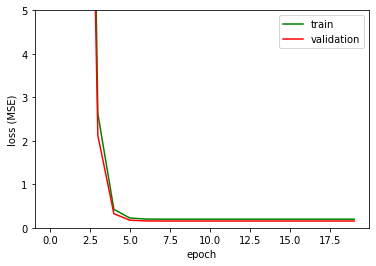

In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from sklearn.model_selection import train_test_split
torch.manual_seed(42)

B=20 # batch size
step_size = 0.1 # learning rate
iter=20 # number epochs

############################################ Creating synthetic data
# Creating a function f(X) with a slope of -5
X = torch.arange(-5, 5, 0.1).view(-1, 1) # rank-2 tensor
func = -5 * X + 2
# Adding Gaussian noise to the function f(X) and saving it in Y
y = func + 0.4 * torch.randn(X.size())

##################################### Create train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

########################################## Baseline: Linear regression LS solution
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
print('coefficients:',reg.intercept_,reg.coef_)

####################################################### Gradient Descent
# initial weights
coeffs=torch.tensor([-20.,-10.]).requires_grad_() 

# defining the function for prediction (linear regression)
def calc_preds(x): return coeffs[0] + coeffs[1] * x 

# Computing MSE loss for one batch of exemples
def calc_loss_from_labels(y_pred, y): return torch.mean((y_pred - y) ** 2)

# lists to store losses for each epoch
training_losses=[]; validation_losses=[]

# epochs
for i in range(iter):
  # calculating loss as in the beginning of an epoch and storing it
    y_pred = calc_preds(X_train)
    training_losses.append(calc_loss_from_labels(y_pred, y_train).tolist())
    y_pred = calc_preds(X_valid)
    validation_losses.append(calc_loss_from_labels(y_pred, y_valid).tolist())
    # mini-batch gradient descent: weight are updated after each batch
    for idx_start in np.arange(0,X_train.shape[0],B):
        # create batch
        batch_X=X_train[idx_start:(idx_start+B),:]
        batch_y=y_train[idx_start:(idx_start+B):]
        # making a prediction in forward pass
        y_pred = calc_preds(batch_X)
        # calculating the loss between predicted and actual values
        loss = calc_loss_from_labels(y_pred, batch_y)
        # compute gradient
        loss.backward()
        with torch.no_grad():
            # update coeffs
            coeffs.sub_(coeffs.grad * step_size)
            # zerofy gradients (because they add up)
            coeffs.grad.zero_()

print('batch size:', B)
print('coeffs found by gradient descent:',coeffs.requires_grad_(False))
# plot training and validation losses along epochs
plt.plot(training_losses, '-g',  validation_losses, '-r')
plt.gca().legend(('train','validation'))
plt.ylim(0, 5)
plt.xlabel('epoch')
plt.ylabel('loss (MSE)')
plt.show()

# Some techniques to improve deep learning

**Regularization** is a technique used in machine learning to prevent overfitting by adding a penalty term to the loss function. This encourages the model to learn a simpler representation of the data and reduces its capacity to memorize the training data.

**Self-regularized activation functions** can help improve the generalization performance of a neural network by introducing an implicit form of regularization. This can be achieved through various mechanisms, such as controlling the distribution of the activations or the gradients. For example, the *Mish activation function* has been shown to have a self-regularizing effect due to its non-monotonic and smooth nature, which can help prevent the vanishing gradient problem and improve the training dynamics of deep neural networks.

The *Mish activation function* (https://arxiv.org/abs/1908.08681) is an alternative to *ReLu*. It is a smooth, continuous, self regularized, non-monotonic activation function mathematically defined as

$$f(x)= x \, {\rm tanh} (\ln (1+e^x)).$$

**Dropout** is a regularization technique used in deep learning to prevent overfitting. It works by randomly “dropping out” or deactivating some of the neurons in a neural network during training. This means that during each forward pass, some of the neurons are temporarily removed from the network, along with all their incoming and outgoing connections.

The idea behind dropout is to introduce randomness and prevent the model from relying too heavily on any single neuron or feature. By randomly dropping out neurons during training, the model is forced to learn a more robust representation of the data that is less sensitive to small changes in the input.

Dropout is typically applied to the hidden layers of a neural network and can be controlled by a hyperparameter called the dropout rate, which specifies the probability that any given neuron will be dropped out during training. A common value for the dropout rate is 0.5, meaning that on average, half of the neurons in a given layer will be dropped out during each forward pass.

During testing or inference, dropout is not applied and all neurons are active. However, to account for the fact that only a fraction of the neurons were active during training, the outputs of the neurons are typically scaled down by the dropout rate.

**Momentum**  is a technique used in deep learning to accelerate the training of neural networks. It is an optimization algorithm that helps the model converge faster by adding a fraction of the previous weight update to the current weight update.

In gradient descent, the weights of a neural network are updated by taking a step in the direction of the negative gradient of the loss function with respect to the weights. This can sometimes result in slow convergence or getting stuck in local minima. Momentum addresses these issues by introducing a “momentum” term that takes into account the previous weight updates.

The idea behind momentum is to add a fraction of the previous weight update to the current weight update, effectively “smoothing out” the updates and helping the model converge faster. This can be controlled by a hyperparameter called the momentum coefficient, which specifies how much of the previous weight update should be added to the current weight update. A common value for the momentum coefficient is 0.9.

Momentum can be used with various optimization algorithms, such as stochastic gradient descent (SGD) or Adam, to improve their convergence properties.

**Adam** (short for Adaptive Moment Estimation) is an optimization algorithm commonly used in deep learning to train neural networks. It is an extension of stochastic gradient descent (SGD) that incorporates ideas from other optimization algorithms such as AdaGrad and RMSProp.

Adam works by maintaining an estimate of the first and second moments of the gradients (i.e., the mean and uncentered variance) and using these estimates to adaptively adjust the learning rate for each weight in the network. This allows the algorithm to converge faster and achieve better performance than traditional SGD.

One of the key advantages of Adam is that it requires little tuning of its hyperparameters. The algorithm has three main hyperparameters: the learning rate, the first moment decay rate (beta1), and the second moment decay rate (beta2). The default values for these hyperparameters (0.001, 0.9, and 0.999, respectively) usually work well in practice.

Adam has been shown to work well on a wide range of deep learning problems and is often used as the default optimizer in many deep learning frameworks.




# Assessing ML performance

## Error rate and accuracy

Notebook [Lesson1_00_is_it_a_bird_creating_a_model_from_your_own_data.ipynb](Lesson1_00_is_it_a_bird_creating_a_model_from_your_own_data.ipynb) uses  `error_rate` when creating the `learner`:

    learn = vision_learner(dls, resnet18, metrics=error_rate)

    learn.fine_tune(3)

where `dls` is a `DataLoaders` object with the input data, `resnet18` is a deep CNN model. The argument `metrics=error_rate` indicates that the overall performance of the algorithm is measured proportion of mismatches between the set of actual labels $y_1, \dots , y_n$ and the set of predicted labels $\hat{y}_1, \dots , \hat{y}_n$. A very similar metric is `accuracy` which is simply `1-error_rate`. 

When one trains a classifier in `fastai`, the output for the training epochs looks like

<img src="https://drive.google.com/uc?export=view&id=1PJ36nJ-Isu-LThJTFwRj7XwVY5qWeRfJ" width="300" >

One could wonder how the  `error_rate` is computed when the data set is divided into *training* and *validation* sets. In `fastai`, because the training set and validation set are integrated into a single class (`dataloaders`),  by default the metrics displayed during training (as in the output above) use the validation set, so the `error_rate`is computed over the validation set.

At this point it should be clear what `epoch`, `train_loss`, `valid_loss` and `error_rate` in the above training output are:
1. `epoch`: number of times that the whole set of examples has been used for prediction;
2. `train_loss`: the value of the loss function computed with the model weights for that epoch and the training examples;
3. `valid_loss`: the value of the loss function computed with the model weights for that epoch and the validation examples;
4. `error_rate`: proportion of mismatches between the set of actual labels $y_1, \dots , y_n$ and the set of predicted labels $\hat{y}_1, \dots , \hat{y}_n$ computed with the model weights for that epoch and the validation examples.

There are many metrics other than `error_rate` for measuring the performance of *regression* and *classification* problems. For instance, `scikit-learn` provides the metrics listed in 
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics. The package `fastai`  includes  all metrics from `scikit-learn` and some additional ones. The documentation is available at https://docs.fast.ai/metrics.html. 




## Confusion matrix

In [Lesson2_edited_book_02_production.ipynb](Lesson2_edited_book_02_production.ipynb), to understand in detail which  mistakes the model is making,  a confusion matrix (also called an *error matrix*) was created with 

    interp = ClassificationInterpretation.from_learner(learn)

    interp.plot_confusion_matrix()

which output was: 

<img src="https://drive.google.com/uc?export=view&id=1zsTJ7wh6KneWG7_QuXijy5LDlJiu3K-F" width="300" >


The comment in the notebook for this figure is the following: The rows represent all the black, grizzly, and teddy bears in our dataset, respectively. The columns represent the images which the model predicted as black, grizzly, and teddy bears, respectively. Therefore, the diagonal of the matrix shows the images which were classified correctly, and the off-diagonal cells represent those which were classified incorrectly. This is one of the many ways that fastai allows you to view the results of your model. *It is (of course!) calculated using the validation set*. 


# Some specific models for ML

## Tabular data

So far all ''from scratch'' examples above (simple linear regression, quadratic regression) dealt with *scalar* inputs, i.e. each example was described by a single number. 

Examples can also be tabular data, where each example is described by a numeric vector. Formally, the $i$-th example is described by a vector  $(x_{i1}, \dots, x_{ik})$ of length $k$, for examples $i = 1, \dots, n$ and labels are $y_1, \dots,  y_n$  as before.




### Perceptron

The *perceptron* is one of the simplest models for numerical tabular data and 0/1 classification problems.

<img src="https://drive.google.com/uc?export=view&id=1HqHfJn7ejJMGeAa5fTTQzW_myubIDsDh" width="600" >


The model is 

$$f_{\rm \bf w}(x_1,\dots,x_k)= \sigma (w_1 \, x_1 + \dots + w_k \, x_k)$$

where $\sigma(.)$ is the activation function, and it is defined by 

$$\sigma(z) = \left\{\begin{align}
1 &, &  z \ge t \\
0 &, &  z < t \\
\end{align} \right.$$

where $t$ is some *threshold*.


The code below is an adaptation of the code for simple linear regression, where the examples are tabular data instead of just scalar values, and the classes are 0/1 as in the *Titanic* example in notebook [Lesson5_edited_for_colab_linear_model_and_neural_net_from_scratch.ipynb](Lesson5_edited_for_colab_linear_model_and_neural_net_from_scratch.ipynb).

Here, we consider that the input data as already been pre-processed, and all explanatory variables $(x_{i1},\dots,x_{ik})$ are numerical, while the response variable is $y_i \in \{0,1\}$ for $n$ examples $i=1,\dots,n$.

In matrix form, each row represents one example. For $n$ examples $i=1,\dots,n$, the following matrices represent the examples and the labels.

$
	{\rm \bf X}= \begin{bmatrix} 
	x_{11} & \dots & x_{1k} \\
	x_{21} & \dots & x_{2k} \\
	\dots & \dots & \dots\\
	x_{n1} & \dots & x_{nk} \\
	\end{bmatrix}~~~~~~
$
$
	{\rm \bf y}= \begin{bmatrix} 
	y_1  \\
	y_2  \\
	\dots \\
	y_n  \\
	\end{bmatrix}
$

Since each example corresponds to a row of ${\rm \bf X}$, the $i$-th example is  $(x_{i1},\dots,x_{ik})$
and has label $y_i \in \{0,1\}$. 

To prevent discontinuities, one can choose instead for $\sigma(.)$  a continuous function. The usual candidate is the *sigmoid* function

$$\sigma(z)= \frac{1}{1+e^{-z}}$$

that ranges between 0 and 1. This function is available in `pytorch` through `torch.sigmoid`. 



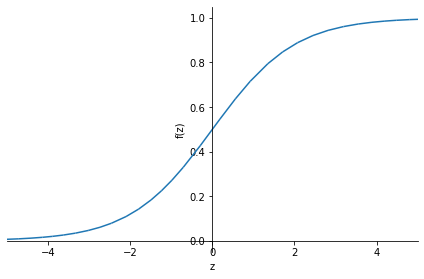

In [ ]:
import sympy
sympy.plot("1/(1+exp(-z))", xlim=(-5,5));


The following code allows you to compare results from multiple linear regression and the perceptron for the Titanic data set problem. Try changing some parameters for gradient descent to see what happens.

coefficients MLR: [0.5854171] [[-0.0042809  -0.04922816 -0.03017007  0.05970862 -0.5046148   0.22423151
   0.1791499   0.07168674  0.04639366]]


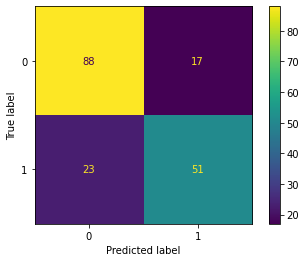

coefficients GD: tensor([-0.4428, -0.8563,  0.0372,  0.9528, -0.6359,  0.6533, -0.0090,  0.5945,
        -0.0683, -0.1924,  0.3725,  0.0073])


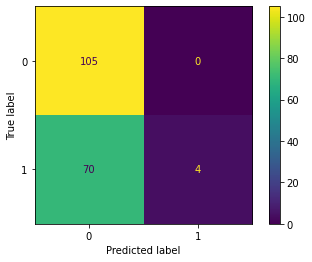

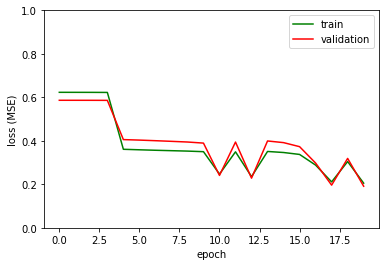

In [ ]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
torch.manual_seed(42)

B=10 # batch size
lr = 0.1 # learning rate
iter=20 # number epochs

############################################ Reading Titanic numerical data, i.e., X and y
var_names=['Age', 'SibSp', 'Parch', 'LogFare', 'Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
path=Path('/content/drive/MyDrive/AAA/Lesson_5/titanic_data') # adapt to your path
X,y=torch.load(path/'titanic_tensor_data_set.ts') # these values are not yet normalized
y=y[:,None] # to turn it into a column vector

##################################### Create train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

############################################## Ordinary least squares solution with 0.5 threshold
# variables to keep to avoid linear dependencies
var_keep=['Age', 'SibSp', 'Parch', 'LogFare', 'Sex_male',  'Pclass_1', 'Pclass_2',  'Embarked_C', 'Embarked_Q']
keep=np.isin(var_names,var_keep) # boolean list
# 
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train[:,keep], y_train)
print('coefficients MLR:',reg.intercept_,reg.coef_)
y_pred=reg.predict(X_valid[:,keep])
disp = ConfusionMatrixDisplay(confusion_matrix(y_valid,(y_pred>0.5)))
disp.plot()
plt.show()

####################################################### Gradient Descent
# if you want to standardize X and include an additional additive coefficient to the model:
if False: 
  means = X.mean(dim=1, keepdim=True)
  stds = X.std(dim=1, keepdim=True)
  X=normalized_data = (X - means) / stds
  # add column of 1s to X
  ones=torch.ones(X.shape[0]).reshape(X.shape[0],1)
  X=torch.cat((ones,X),1)
  X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# initial weights
def init_coeffs(n_coeff): return (torch.rand(n_coeff,1)-0.5).requires_grad_() # creates a column matrix

# defining the function for prediction: the output is a vector of size=nrows(X)
def calc_preds(coeffs,X): return  torch.sigmoid(X@coeffs) # using matrix multiplication (aka matmul)

# Computing MSE loss for one batch of exemples: the output is a scalar
def calc_loss_from_labels(y_pred, y): return torch.mean((y_pred - y) ** 2)

# update coeffs
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    # zerofy gradients (because they add up)
    coeffs.grad.zero_()

# compute initial weights as a column matrix
n_coeff = X_train.shape[1] # number of columns of X, or X_train, or X_valid
coeffs = init_coeffs(n_coeff)

# create lists to store losses for each epoch
training_losses=[]; validation_losses=[]

# epochs
for i in range(iter):
  # calculating loss as in the beginning of an epoch and storing it
    y_pred = calc_preds(coeffs,X_train)
    training_losses.append(calc_loss_from_labels(y_pred, y_train).tolist())
    y_pred = calc_preds(coeffs,X_valid)
    validation_losses.append(calc_loss_from_labels(y_pred, y_valid).tolist())
    # mini-batch gradient descent: weight are updated after each batch
    for idx_start in np.arange(0,X_train.shape[0],B):
        # create batch
        batch_X=X_train[idx_start:(idx_start+B),:]
        batch_y=y_train[idx_start:(idx_start+B):]
        # making a prediction in forward pass
        y_pred = calc_preds(coeffs,batch_X)
        # calculating the loss between predicted and actual values
        loss = calc_loss_from_labels(y_pred, batch_y)
        # compute gradient
        loss.backward()
        with torch.no_grad():
            # update coeffs
            update_coeffs(coeffs, lr)

# predictions and confusion matrix
print('coefficients GD:',torch.flatten(coeffs.requires_grad_(False)))
y_pred=calc_preds(coeffs,X_valid)
disp = ConfusionMatrixDisplay(confusion_matrix(y_valid,(y_pred>0.5)))
disp.plot()
plt.show()

# plot losses along epochs
plt.plot(training_losses, '-g',  validation_losses, '-r')
plt.gca().legend(('train','validation'))
plt.ylim(0, 1)
plt.xlabel('epoch')
plt.ylabel('loss (MSE)')
#plt.title("Train (green) and validation (red) losses")
plt.show()

### Feed-forward fully connected neural network with ReLu units

The next step is to add more layers to the model. Instead of having just one output from the first (input) layer, the model can have many units in the following *hidden* layers. In general, the number of model outputs (output layer) is equal to the number of labels (one is enough for the Titanic problem, since the prediction is just "survived" or not). As mentioned earlier, typically there is either a *sigmoid* unit or a *softmax* layer to complete the model, so the final outputs can be interpreted as probabilities.

This model is also known as the *Multilayer Perceptron* (MLP).

If all the intermediate layers would just multiply inputs by weights, the model could be reduced to a single matrix multiplication layer. Therefore, there must some non-linearity after each matrix multiplication. That's what is described in the following figure, where $f$ represents some non-linear *activation function* for each layer of the neural network.

<img src="https://drive.google.com/uc?export=view&id=1Ky82nfC7GUp7YBqp1Spzn9aHDrTzbiCH" width="600" >

The layer is called *fully connected* when each matrix multiplication, which returns the dot product $x_1 \, w_1 + \dots + x_n \, w_n$ envolves all neurons from the previous layer. 

Typically, all activation functions ($f$ in the figure above) for the *hidden layers* are called rectified linear units (*ReLu*) and they represent the following continuous function, which is the identity function for positive arguments and *zero* for negative arguments.

${\rm ReLu}(z) = \left\{\begin{align}
z &, &  z \ge 0 \\
0 &, &  z < 0 \\
\end{align} \right.$

If there is only one output, the activation layer for the *output layer* is typically the *sigmoid* function. If there is more than one output (as in the figure above), the typical choice of activation function for the output layer is the *softmax* function.

For first *neuron* in the first hidden unit, the calculation goes exactely as  we discussed for the perceptron model, where the inputs are multiplied by the  weights $w_1^{(1)},\dots, w_4^{(1)}$ to return

$$w_1^{(1)} \, x_1 + w_2^{(1)} \, x_2 + w_3^{(1)} \, x_3 + w_4^{(1)} \, x_4 .$$

The same product is computed for the second neuron of the first hidden layer, but for a *different set of weights* $w_1^{(2)},\dots, w_4^{(2)}$, and so on. Hence, in total there are for the example in the figure above, 12 multiplicative weights (4 input variables $\times$ 3 neuros in the hidden layer). The three multiplications (for the three neurns in the hidden layer) can all be done with a single matrix multiplication:

If the weights and input values are  $~~~~~
	{\rm W}= \begin{bmatrix} 
	w_{1}^{(1)} & w_{2}^{(1)} & w_{3}^{(1)} & w_{4}^{(1)} \\
	w_{1}^{(2)} & w_{2}^{(2)} & w_{3}^{(2)} & w_{4}^{(2)} \\
	w_{1}^{(3)} & w_{2}^{(3)} & w_{3}^{(3)} & w_{4}^{(3)} \\
	\end{bmatrix}~~~{\rm and}~~~~
$
$
	{\rm x}= \begin{bmatrix} 
	x_1  \\
	x_2 \\
	x_3  \\
	x_4  \\
	\end{bmatrix}~~~
$

then, the hidden layer three outputs (before applying the activation function) are just the rows of the product ${\rm W} \, {\rm x}$:

$$ {\rm  W} \, {\rm x}= \begin{bmatrix} 
	w_1^{(1)} \, x_1 + w_2^{(1)} \, x_2 + w_3^{(1)} \, x_3 + w_4^{(1)} \, x_4  \\
	w_1^{(2)} \, x_1 + w_2^{(2)} \, x_2 + w_3^{(2)} \, x_3 + w_4^{(2)} \, x_4  \\
	w_1^{(3)} \, x_1 + w_2^{(3)} \, x_2 + w_3^{(3)} \, x_3 + w_4^{(3)} \, x_4  \\
	\end{bmatrix}
.$$

This is very convenient since matrix multiplication can be computed quickly.

Note that it is usual to include also an *additive weight* for each neuron (this is called the *bias*). Without lost of generality, we can think that $x_1$ is an artificial input which value is always 1, and therefore $w_1^{(j)} \times x_1=w_1^{(j)}$ is the additive weight. In alternative, we can add a weight $w_0^{(j)}$ to each neuron, so the neuron output (before applying the activation function) is 

$$w_0^{(1)} + w_1^{(1)} \, x_1 + w_2^{(1)} \, x_2 + w_3^{(1)} \, x_3 + w_4^{(1)} \, x_4 $$

in the above example.

Putting everything together, the three outputs of the first hidden layer are:

$$
	 {\rm ReLu} \left(w_0^{(1)} + w_1^{(1)} \, x_1 + w_2^{(1)} \, x_2 + w_3^{(1)} \, x_3 + w_4^{(1)} \, x_4 \right)  \\
   {\rm ReLu} \left(w_0^{(2)} + w_1^{(2)} \, x_1 + w_2^{(2)} \, x_2 + w_3^{(2)} \, x_3 + w_4^{(2)} \, x_4 \right)  \\
 {\rm ReLu} \left(w_0^{(3)} + w_1^{(3)} \, x_1 + w_2^{(3)} \, x_2 + w_3^{(3)} \, x_3 + w_4^{(3)} \, x_4 \right)  \\
$$

Then, calculations proceed to the following layer, and so on, until they reach  the output layer. This network is called *feed-forward* because computations are done sequentially layer by layer.



## Image classification

### Convolutional neural networks for image classification

For a detailed overview of convolutional neural networks see the notebook that includes `pytorch`code for computing covolutions:  https://github.com/fastai/fastbook/blob/master/13_convolutions.ipynb. Some concepts and examples from that notebook are included in the text below.

#### Convolutions and kernels

A convolution applies a kernel across an image. A kernel is a little matrix, such as the 3×3 matrix below. The 7×7 grid to the left is the image we're going to apply the kernel to. The convolution operation multiplies each element of the kernel by each element of a 3×3 block of the image. The results of these multiplications are then added together. The diagram  shows an example of applying a kernel to a single location in the image, the 3×3 block around cell 18.

<img src="https://github.com/fastai/fastbook/blob/master/images/chapter9_conv_basic.png?raw=1" id="basic_conv" caption="Applying a kernel to one location" alt="Applying a kernel to one location" width="600">

In the paper ["A Guide to Convolution Arithmetic for Deep Learning"](https://arxiv.org/abs/1603.07285) there are many great diagrams showing how image kernels can be applied. Here's an example from the paper showing (at the bottom) a light blue 4×4 image, with a dark blue 3×3 kernel being applied, creating a 2×2 green output activation map at the top. 

<img alt="Result of applying a 3×3 kernel to a 4×4 image" width="782" caption="Result of applying a 3×3 kernel to a 4×4 image (courtesy of Vincent Dumoulin and Francesco Visin)" id="three_ex_four_conv" src="https://github.com/fastai/fastbook/blob/master/images/att_00028.png?raw=1">

What is the shape of the result? If the original image has a height of `h` and a width of `w`, how many 3×3 windows can we find? As you can see from the example, there are `h-2` by `w-2` windows, so the image we get has a result as a height of `h-2` and a width of `w-2`.

#### Padding, pooling, stride and activation map

**Padding** consists in creating new cells on th emargins of the input, with a given value (in general 0). With appropriate padding, we can ensure that the output **activation map** is the same size as the original image, which can make things a lot simpler when we construct our architectures. The figure below shows how adding padding allows us to apply the kernels in the image corners.

<img src="https://github.com/fastai/fastbook/blob/master/images/chapter9_padconv.svg?raw=1" id="pad_conv" caption="A convolution with padding" alt="A convolution with padding" width="600">

With a 5×5 input, 4×4 kernel, and 2 pixels of padding, we end up with a 6×6 activation map:

<img alt="A 4×4 kernel with 5×5 input and 2 pixels of padding" width="783" caption="A 4×4 kernel with 5×5 input and 2 pixels of padding (courtesy of Vincent Dumoulin and Francesco Visin)" id="four_by_five_conv" src="https://github.com/fastai/fastbook/blob/master/images/att_00029.png?raw=1">

If we add a kernel of size `ks` by `ks` (with `ks` an odd number), the necessary padding on each side to keep the same shape is `ks//2`. An even number for `ks` would require a different amount of padding on the top/bottom and left/right, but in practice we almost never use an even filter size.

**Stride**. So far, when we have applied the kernel to the grid, we have moved it one pixel over at a time. But we can jump further; for instance, we could move over two pixels after each kernel application, as in the figure below. This is known as a *stride-2* convolution. The most common kernel size in practice is 3×3, and the most common padding is 1. As you'll see, **stride-2** convolutions are useful for decreasing the size of our outputs, and **stride-1** convolutions are useful for adding layers without changing the output size.

<img alt="A 3×3 kernel with 5×5 input, stride-2 convolution, and 1 pixel of padding" width="774" caption="A 3×3 kernel with 5×5 input, stride-2 convolution, and 1 pixel of padding (courtesy of Vincent Dumoulin and Francesco Visin)" id="three_by_five_conv" src="https://github.com/fastai/fastbook/blob/master/images/att_00030.png?raw=1">

In an image of size `h` by `w`, using a padding of 1 and a stride of 2 will give us a result of size `(h+1)//2` by `(w+1)//2`. The general formula for each dimension is `(n + 2*pad - ks)//stride + 1`, where `pad` is the padding, `ks`, the size of our kernel, and `stride` is the stride.

**Pooling** is a type of convolution with a fixed operation (not trainable) as illustrated in the example below. This can be used to reduce the size of a layer. However, pooling can be replaced by convolution with stride larger than 1 (see paper "Striving for Simplicity: The All Convolutional Net" at https://arxiv.org/abs/1412.6806). 

<img src="https://epynn.net/_images/pool-01.svg"  width="600">


#### Example with MNIST data set ("3" and "7" digits)

In [ ]:
from fastai.vision.all import *
matplotlib.rc('image', cmap='Greys')
path = untar_data(URLs.MNIST_SAMPLE) # MNIST_SAMPLE only contains digits 3 and 7
path

Path('/root/.fastai/data/mnist_sample')

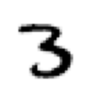

In [ ]:
im3 = Image.open(path/'train'/'3'/'12.png')
show_image(im3);

In [ ]:
# create dataloaders (dls)
mnist = DataBlock((ImageBlock(cls=PILImageBW), CategoryBlock), 
                  get_items=get_image_files, 
                  splitter=GrandparentSplitter(),
                  get_y=parent_label)

dls = mnist.dataloaders(path)
xb,yb = first(dls.valid)
# By default, fastai puts data on the GPU when using data blocks. Let's move it to the CPU for our examples:
xb,yb = to_cpu(xb),to_cpu(yb)
xb.shape # batch size, number of channels, number of rows, number of columns

torch.Size([64, 1, 28, 28])

#### Creating a simple CNN from scratch

We will create a CNN from scratch with `nn.Conv2d`. First, we'll define a function with the basic parameters we'll use in each convolution. Each layer receives `ni` channels of input and produces `nf` output features.

In [ ]:
# ni and nf are the number of input and output channels (also called output features)
def conv(ni, nf, ks=3, act=True):
    res = nn.Conv2d(ni, nf, stride=2, kernel_size=ks, padding=ks//2)
    if act: res = nn.Sequential(res, nn.ReLU())
    return res

# build CNN:
simple_cnn = sequential(
    conv(1 ,4),            #14x14
    conv(4 ,8),            #7x7
    conv(8 ,16),           #4x4
    conv(16,32),           #2x2
    conv(32,2, act=False), #1x1
    Flatten(),
)
simple_cnn(xb).shape

torch.Size([64, 2])

So, overall, the model's input (`batch`, `channel`, `height`, `width`) is a batch of 64 examples of 1-channel images with 28 rows and columns, and outputs two activations, which map to the two possible levels in our labels. 

We can now create the `learner`, and look at its structure with `summary`.


In [ ]:
learn = Learner(dls, simple_cnn, loss_func=F.cross_entropy, metrics=accuracy)
learn.summary()

Sequential (Input shape: 64 x 1 x 28 x 28)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 4 x 14 x 14    
Conv2d                                    40         True      
ReLU                                                           
____________________________________________________________________________
                     64 x 8 x 7 x 7      
Conv2d                                    296        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 16 x 4 x 4     
Conv2d                                    1168       True      
ReLU                                                           
____________________________________________________________________________
                     64 x 32 x 2 x 2     
Conv2d                                    4640       True      
ReLU                                          

In [ ]:
learn.fit_one_cycle(2, 0.01)

epoch,train_loss,valid_loss,accuracy,time
0,0.072641,0.039753,0.985280,00:13
1,0.030240,0.031761,0.989696,00:14


#### Weights and bias parameters

The number of parameters depend on the kernel size, the number of input channels and the number of output features. Each convolution applies over the kernel and the input channels. There will be one convolution per output feature. The number of multiplicative weights per convolution is therefore `ni*ks*ks`. If there is an additive weight (bias) that will add one more parameter per convolution. Finally, the number of parameters `ni*ks*ks+1`must be multiplied by the number `nf` of output fatures. 

The summary shows we have 40 parameters for the first convolution, which is  `nf*(ni*ks*ks+1)=4*(1*3*3+1)`. Four of those parameters are for the bias.

In [ ]:
m = learn.model[0] # first layer
print(m)
print(m[0].weight.shape)
print(m[0].bias.shape)

Sequential(
  (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
)
torch.Size([4, 1, 3, 3])
torch.Size([4])


Similarly, for the second convolution, the depth of the input is `4`, the kernel is `3x3` which means that there are `4*3*3` multiplicative weights and `1` additive weight (bias) per output feature. Since the depth (`nf`=number output features) is 8, then, in total there are `8*(4*3*3+1)=296` parameters.

We can now use this information to clarify the statement : "When we use a stride-2 convolution, we often increase the number of features because we're decreasing the number of activations in the activation map by a factor of 4; we don't want to decrease the capacity of a layer by too much at a time."

There is one bias for each channel. (Sometimes channels are called *features* or *filters* when they are not input channels.) The output shape is `64x4x14x14`, and this will therefore become the input shape to the next layer. The next layer, according to `summary`, has 296 parameters. Let's ignore the batch axis to keep things simple. So for each of `14*14=196` locations we are multiplying `296-8=288` weights (ignoring the bias for simplicity), so that's `196*288=56448` multiplications at this layer. The next layer will have `7*7*(1168-16)=56448` multiplications.

What happened here is that our stride-2 convolution halved the *grid size* from `14x14` to `7x7`, and we doubled the *number of filters* from 8 to 16, resulting in no overall change in the amount of computation. If we left the number of channels the same in each stride-2 layer, the amount of computation being done in the net would get less and less as it gets deeper. But we know that the deeper layers have to compute semantically rich features (such as eyes or fur), so we wouldn't expect that doing *less* computation would make sense.

#### Receptive Fields

The *receptive field* is the area of an image that is involved in the calculation of a layer. 

<img alt="Secondary precedents of conv2 layer" width="700" caption="Secondary precedents of Conv2 layer" id="preced2" src="https://github.com/fastai/fastbook/blob/master/images/att_00069.png?raw=1">

In this example, we have just two convolutional layers, each of stride 2, so this is now tracing right back to the input image. We can see that a 7×7 area of cells in the input layer is used to calculate the single green cell in the Conv2 layer. This 7×7 area is the *receptive field* in the input of the green activation in Conv2. We can also see that a second filter kernel is needed now, since we have two layers.

As you see from this example, the deeper we are in the network (specifically, the more stride-2 convs we have before a layer), the larger the receptive field for an activation in that layer. A large receptive field means that a large amount of the input image is used to calculate each activation in that layer is. We now know that in the deeper layers of the network we have semantically rich features, corresponding to larger receptive fields. Therefore, we'd expect that we'd need more weights for each of our features to handle this increasing complexity. This is another way of saying the same thing we mentioned in the previous section: when we introduce a stride-2 conv in our network, we should also increase the number of channels.

#### Batch Normalization

Batch normalization  tries to maintain a good distribution of activations throughout training.

Sergey Ioffe and Christian Szegedy presented a solution to this problem in the 2015 paper ["Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift"](https://arxiv.org/abs/1502.03167). In the abstract, they describe just the problem that we've seen:

> : Training Deep Neural Networks is complicated by the fact that the distribution of each layer's inputs changes during training, as the parameters of the previous layers change. This slows down the training by requiring lower learning rates and careful parameter initialization... We refer to this phenomenon as internal covariate shift, and address the problem by normalizing layer inputs.

Their solution, they say is:

> : Making normalization a part of the model architecture and performing the normalization for each training mini-batch. Batch Normalization allows us to use much higher learning rates and be less careful about initialization.


Batch normalization (often just called *batchnorm*) works by taking an average of the mean and standard deviations of the activations of a layer and using those to normalize the activations. However, this can cause problems because the network might want some activations to be really high in order to make accurate predictions. So they also added two learnable parameters (meaning they will be updated in the SGD step), usually called `gamma` and `beta`. After normalizing the activations to get some new activation vector `y`, a batchnorm layer returns `gamma*y + beta`.

That's why  activations can have any mean or variance, independent from the mean and standard deviation of the results of the previous layer. Those statistics are learned separately, making training easier on our model. The behavior is different during training and validation: during training, we use the mean and standard deviation of the batch to normalize the data, while during validation we instead use a running mean of the statistics calculated during training.

Let's add a batchnorm layer to `conv` and fit again the model.

In [ ]:
def conv(ni, nf, ks=3, act=True):
    layers = [nn.Conv2d(ni, nf, stride=2, kernel_size=ks, padding=ks//2)]
    if act: layers.append(nn.ReLU())
    layers.append(nn.BatchNorm2d(nf))
    return nn.Sequential(*layers)
    
learn.fit_one_cycle(2, 0.01)

epoch,train_loss,valid_loss,accuracy,time
0,0.019299,0.015921,0.993621,00:13
1,0.005612,0.009632,0.997056,00:13


#### CNN as Encoders

LeNet (1998) to VGG-net (2015) are two examples of convolutional neural networks for image classification. Typically, they have an input layer which is a tensor that represents an image with dimension *(number rows, number columns, number channels)*, followed by sets of *convolutional* layers, *ReLu* layers, and *pooling* layers, and at the end they have a couple of   *fully connected layers*  followed by a *sofwmax* or a *sigmoid layer*.

LeNet: 

<img src="https://drive.google.com/uc?export=view&id=1-Nxj4sRWiWmjWcPgVnqcoSItiuJo38oH" width="700" >


VGG-net: 

<img src="https://drive.google.com/uc?export=view&id=1hoR6Qxda7Ls0VsY-xAzSz1ddlL6IEAnT" width="700" >



Those kind of networks exhibit the following structure:
1.  reduction of width and height dimensions of input through each layer in this network; 
2. accompanied by an organized increment in the number of channels in each layer.




#### Resnets

Diagram that describes `resnet18`. The arrows represent the application of the identity function. That architecture, proposed in https://arxiv.org/abs/1512.03385, reformulate the layers as learning residual functions with reference to the layer inputs, instead of learning unreferenced functions. Those residual networks are easier to optimize, and can gain accuracy from considerably increased depth.

<img src="https://www.researchgate.net/profile/Sajid-Iqbal-13/publication/336642248/figure/fig1/AS:839151377203201@1577080687133/Original-ResNet-18-Architecture_W640.jpg" width="700" >

### Convolutional neural networks for image segmentation: the encoder/decoder model

U-nets (https://arxiv.org/abs/1505.04597) are a kind of neural networks used for image segmentation which has an encoder that converts input into a small but with nany channels, followed by a decoder that generates a output with the same number of rows and columns as the input. The output is the predicted segmentation of the input image.


<img src="https://www.frontiersin.org/files/Articles/841297/fnagi-14-841297-HTML-r2/image_m/fnagi-14-841297-g001.jpg" width="700" >

This approach for image segmentation can be applied to large images by an *overlap-tile strategy* as illustrated by Figure 2 in https://arxiv.org/abs/1505.04597:  

<img src="https://github.com/isa-ulisboa/greends-pml/blob/main/images/overlap-tile-strategy-U-net-paper-2015.png?raw=1" width="700" >


A commented example of the use of a U-Net to segment self-driving cars street photos is available at [Image_Segmentation_with_Unet.ipynb](Image_Segmentation_with_Unet.ipynb).





## Decision trees

The `DecisionTreeClassifier` class in `scikit-learn` allows you to choose from several criteria to measure the quality of a split. The available criteria for *classification trees* are:

1. `gini`: This is the default criterion and it measures the impurity of a set of samples as the probability of misclassifying a randomly chosen element from the set: $G = 1 - \sum_{i=1}^n p_i^2$, where $p_i$ is the probability of belonging to the $i$th class.
2. `entropy`: This criterion measures the impurity of a set of samples as the amount of information gained about the class variable from observing the features: $E=-\sum_{i=1}^n p_i \log_2 p_i$.

Both measures range from 0 (minimum impurity, maximum certainty) to 1 (maximum impurity, minimum certainty). 

The reduction in entropy resulting from a split can be considered a measure of the gain in information, and this gain in information can be interpreted as a reduction in the *loss* of the model. In this sense, the reduction in entropy resulting from a split can be viewed as a loss measure, with the goal being to *minimize the loss* by finding the split that results in the greatest reduction in entropy.

The loss function is calculated separately for each subset resulting from the split, and the *total loss* is the weighted sum of the losses of the subsets, where the weights are the fractions of samples in each subset. The split with the lowest total loss (i.e., the greatest reduction in entropy) is chosen as the best split. The expression for the loss of a split is the following, where instead of the entropy ($E$) one could use the Gini criterion $G$.

$$L = \frac{n_{\rm left}}{n} \times E_{\rm left} + \frac{n_{\rm right}}{n} \times E_{\rm right}$$

For *regression trees* the criteria are `mse`and `mae`.

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
from matplotlib import pyplot as plt
iris = load_iris()

X = iris.data
y = iris.target
print(iris.target_names)

#build decision tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4,min_samples_leaf=4)
#max_depth represents max level allowed in each tree, min_samples_leaf minumum samples storable in leaf node

#fit the tree to iris dataset
clf.fit(X,y)

#plot decision tree
fig, ax = plt.subplots(figsize=(10, 10)) #figsize value changes the size of plot
tree.plot_tree(clf,ax=ax,feature_names=['sepal length','sepal width','petal length','petal width'])
plt.show()